In [11]:
#importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold,cross_val_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix

In [12]:
df=pd.read_csv("/home/user7/Downloads/ML1/MSDS.csv")
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [13]:

# Drop rows with any null values
df = df.dropna()

# Print the number of rows and columns in the cleaned dataset
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (13299, 18)


In [17]:
#creating features and label
features = df.drop(['STATUS'],axis=1)
labels = df['STATUS']

In [18]:
#creating dummy variables
features = pd.get_dummies(features)

In [20]:
features.head()

,APP_ID,CIBIL_SCORE_VALUE,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,NEW_CUST_NO,NEW_CUST_YES,SEX _F,SEX _M
0,12345,0,1,0,31,3,0,0,1,4,2,36,0,0.767104,12,0,1,1,0
1,12347,0,1,1,40,2,1,1,0,1,1,12,2,0.619077,24,1,0,1,0
2,12349,0,1,0,27,3,0,0,1,2,2,72,0,0.848949,36,0,1,1,0
3,12351,2,1,1,33,2,0,1,0,2,1,120,1,0.515646,12,1,0,0,1
4,12353,2,1,1,29,1,0,1,1,2,1,24,2,0.614123,24,1,0,1,0


In [21]:
#splitting into train, test split
X_train,X_test, y_train,y_test = train_test_split(features, labels, test_size=0.2, random_state=55)

In [22]:
# sclaing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[ 1.18480332,  1.10947828,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [ 0.23436606, -0.04480877,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [-0.12348244, -1.19909583,  0.31852752, ...,  1.43797163,
         0.33160743, -0.33160743],
       ...,
       [ 1.54604251, -0.04480877,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [-0.49385042, -1.19909583,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [ 1.58933905,  1.10947828,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743]])

In [24]:
X_test

array([[-0.62504414,  1.10947828,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [ 1.63915615,  1.10947828,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [ 0.98292669, -0.04480877,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       ...,
       [-0.27606361,  1.10947828,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [ 1.39789532,  1.10947828,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743],
       [-1.33787209, -0.04480877,  0.31852752, ..., -0.69542401,
         0.33160743, -0.33160743]])

In [25]:
random_state=42
# preparing models
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(("Gradient Boosting", GradientBoostingClassifier()))
models.append(("AdaBoost", AdaBoostClassifier()))

In [26]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=15, shuffle=True,random_state=random_state)
    cv_results = cross_val_score(model, features, labels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression: 0.623133 (0.011420)
Decision Tree: 0.567635 (0.018926)
Random Forest: 0.659976 (0.013963)


KeyboardInterrupt: 

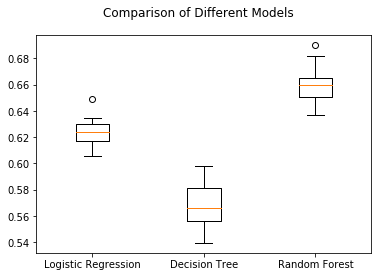

In [27]:
# boxplot for Comparison of Different Models
fig = plt.figure()
fig.suptitle('Comparison of Different Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
cls1 = RandomForestClassifier(random_state=7)
cls1.fit(X_train,y_train)
y_pred = cls1.predict(X_test)

In [29]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6530075187969925
[[1381  290]
 [ 633  356]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1671
           1       0.55      0.36      0.44       989

    accuracy                           0.65      2660
   macro avg       0.62      0.59      0.59      2660
weighted avg       0.64      0.65      0.63      2660



In [30]:
cls2 = GradientBoostingClassifier(random_state=7)
cls2.fit(X_train,y_train)
y_pred = cls2.predict(X_test)

In [31]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6729323308270677
[[1407  264]
 [ 606  383]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1671
           1       0.59      0.39      0.47       989

    accuracy                           0.67      2660
   macro avg       0.65      0.61      0.62      2660
weighted avg       0.66      0.67      0.65      2660

